# Implement a KNN model to classify the animals into categories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
zoo_df = pd.read_csv('D:\\data science\\aasigment\\assigment data set\\Zoo.csv')
class_df = pd.read_csv('D:\\data science\\aasigment\\assigment data set\\class.csv')
zoo_df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [7]:
animal_df = zoo_df.merge(class_df,how='left',left_on='type',right_on='Class_Number')
animal_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


# Data Exploration

In [39]:
zoo = animal_df.drop(['Number_Of_Animal_Species_In_Class'], axis=1)
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,venomous,fins,legs,tail,domestic,catsize,type,Class_Number,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,1,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,0,4,1,0,1,1,1,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,0,1,0,1,0,0,4,4,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,0,4,0,0,1,1,1,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,0,4,1,0,1,1,1,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


In [10]:
zoo.isnull().sum()

animal name     0
hair            0
feathers        0
eggs            0
milk            0
airborne        0
aquatic         0
predator        0
toothed         0
backbone        0
breathes        0
venomous        0
fins            0
legs            0
tail            0
domestic        0
catsize         0
type            0
Class_Number    0
Class_Type      0
Animal_Names    0
dtype: int64

In [11]:
zoo.shape

(101, 21)

In [12]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal name   101 non-null    object
 1   hair          101 non-null    int64 
 2   feathers      101 non-null    int64 
 3   eggs          101 non-null    int64 
 4   milk          101 non-null    int64 
 5   airborne      101 non-null    int64 
 6   aquatic       101 non-null    int64 
 7   predator      101 non-null    int64 
 8   toothed       101 non-null    int64 
 9   backbone      101 non-null    int64 
 10  breathes      101 non-null    int64 
 11  venomous      101 non-null    int64 
 12  fins          101 non-null    int64 
 13  legs          101 non-null    int64 
 14  tail          101 non-null    int64 
 15  domestic      101 non-null    int64 
 16  catsize       101 non-null    int64 
 17  type          101 non-null    int64 
 18  Class_Number  101 non-null    int64 
 19  Class_Ty

In [13]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,venomous,fins,legs,tail,domestic,catsize,type,Class_Number,Class_Type,Animal_Names


In [14]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Class_Number
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000,7.000000


# EDA

<AxesSubplot:>

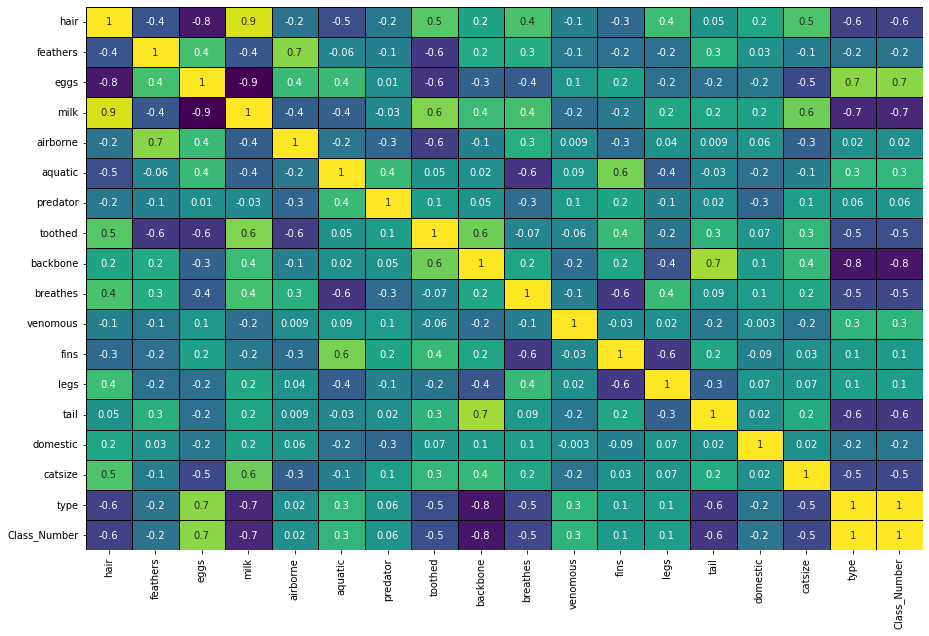

In [15]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

In [17]:
zoo_df = zoo.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','Class_Number','Class_Type']]
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,Class_Number,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1,Mammal


In [18]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type', 'Class_Number',
       'Class_Type', 'Animal_Names'],
      dtype='object')

Text(0.5, 1.0, 'Histogram of Classes')

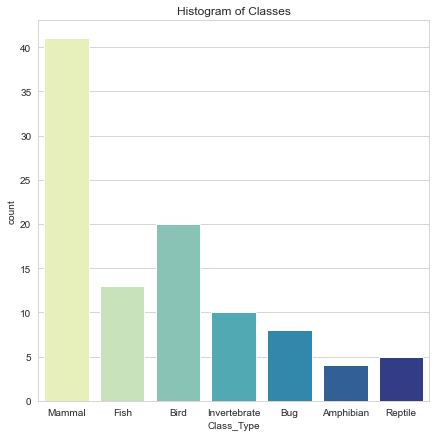

In [19]:
sns.set_style('whitegrid')
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo['Class_Type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes")

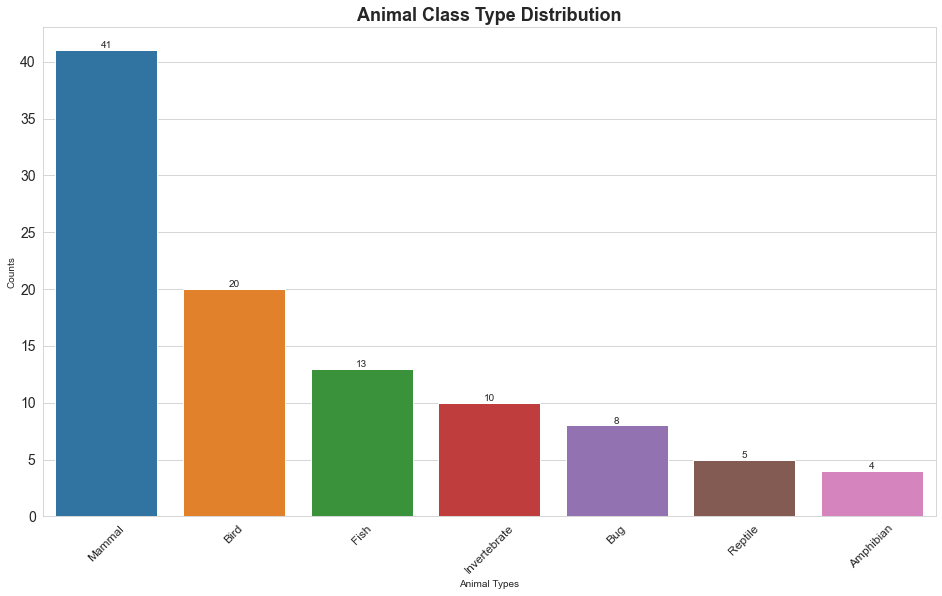

In [20]:
plt.figure(figsize = (16,9))
ax = sns.barplot(x = zoo['Class_Type'].value_counts().index.tolist(), y = zoo['Class_Type'].value_counts().tolist())
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 12)
plt.title("Animal Class Type Distribution",  fontsize = 18, fontweight = 'bold')
plt.xlabel('Animal Types')
plt.ylabel('Counts')
for i in ax.containers:
    ax.bar_label(i,)

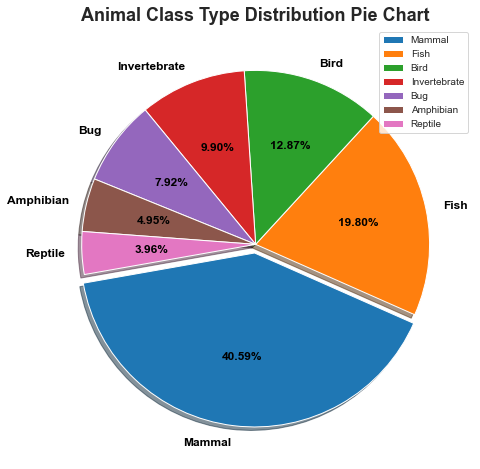

In [21]:
plt.figure(figsize = (12,8))
plt.pie(zoo['Class_Type'].value_counts(),
       labels=zoo.Class_Type.unique(),
       explode = [0.05,0.0,0.0,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Animal Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

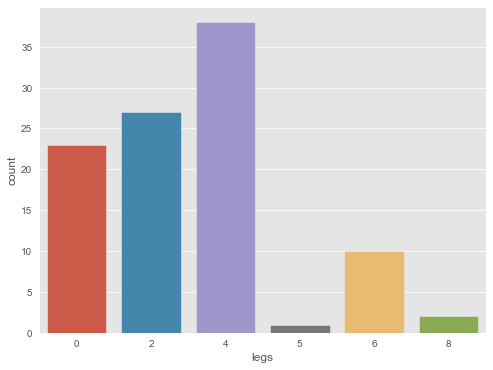

In [22]:
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(zoo["legs"]);

Most of the animals have 4 legs
Least number of animals have 5 legs

# Data Pre-Processing

In [40]:
zoo.drop(['animal name','Animal_Names','Class_Number'], axis=1, inplace=True)

In [44]:
zoo.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,Class_Type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal


In [48]:
X = zoo.drop('Class_Type',axis=1)
Y = zoo[['Class_Type']]

In [50]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [51]:
Y

array([5, 5, 3, 5, 5, 5, 5, 3, 3, 5, 5, 1, 3, 4, 4, 4, 1, 5, 3, 5, 1, 1,
       5, 1, 2, 0, 0, 5, 5, 5, 2, 5, 5, 1, 3, 5, 5, 1, 3, 2, 2, 1, 2, 1,
       5, 5, 4, 5, 5, 5, 5, 2, 0, 4, 5, 5, 1, 1, 1, 1, 3, 3, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 1, 4, 3, 5, 5, 6, 4, 1, 1, 6, 4, 3, 1, 5, 4, 3, 1,
       2, 0, 6, 6, 3, 5, 5, 1, 5, 2, 5, 4, 1])

# Model fitting

In [67]:
X_train, X_test,Y_train, Y_test = train_test_split(X,Y , test_size=0.3,random_state=(0))

In [68]:
knn = KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(X_train,Y_train)
Y_pred_train = knn.predict(X_train)
Y_pred_test = knn.predict(X_test)

In [69]:
ac1 = accuracy_score(Y_train,Y_pred_train)
ac1.round(2)

0.96

In [70]:
ac2 = accuracy_score(Y_test,Y_pred_test)
ac1.round(2)

0.96

In [71]:
ac3 = classification_report(Y_train,Y_pred_train)
print('\n',ac3)


               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         6
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00        30
           6       0.00      0.00      0.00         3

    accuracy                           0.96        70
   macro avg       0.79      0.86      0.82        70
weighted avg       0.92      0.96      0.94        70



Lets check with different K-values :-

In [87]:
train_accuracy = []
test_accuracy = []

for i in range(3,30,2):
    knn = KNeighborsClassifier(n_neighbors=i,p=2)
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    train_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(2))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(2))

d1 = pd.DataFrame(range(3,30,2))
d2 = pd.DataFrame(train_accuracy)
d3 = pd.DataFrame(test_accuracy)

In [88]:
pd.concat([d1,d2,d3],axis=1)

,0,0,0
0,3,0.99,0.94
1,5,0.96,0.94
2,7,0.90,0.90
3,9,0.86,0.87
4,11,0.83,0.84
5,13,0.80,0.81
6,15,0.79,0.74
7,17,0.70,0.61
8,19,0.73,0.61
9,21,0.73,0.61


as we can see K=3 and k=5 are giving good accuracy score lets check which is best

# Applying KNN using K=3

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=3


[[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  2  0  0  0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.78      1.00      0.88         7
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        11
           6       0.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



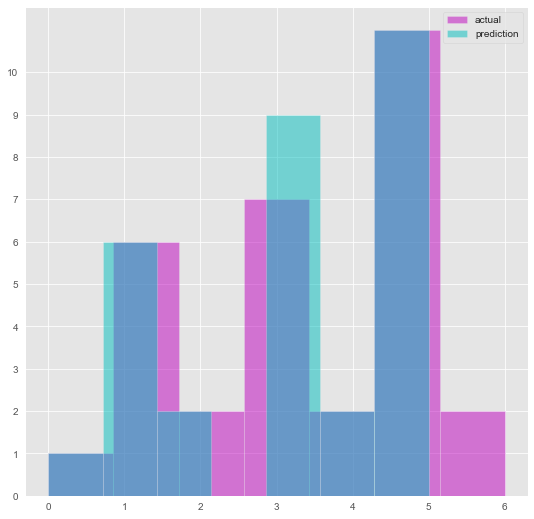

In [90]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# Applying KNN using K=5

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

WITH K=5


[[ 1  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 11  0]
 [ 0  0  0  2  0  0  0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         2
           3       0.78      1.00      0.88         7
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00        11
           6       0.00      0.00      0.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



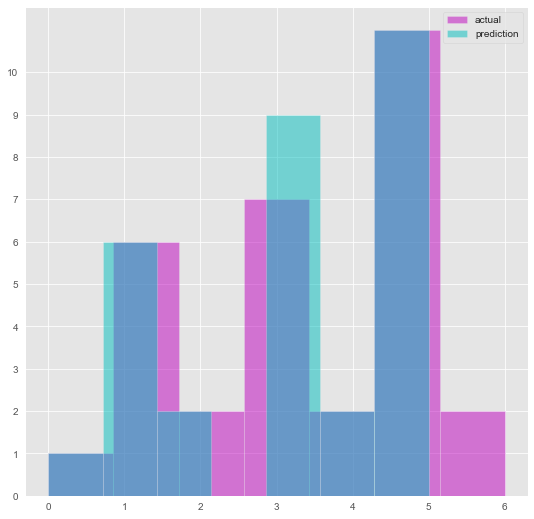

In [93]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

# I'll run the exact same code as before changing nothing but using has_legs and not legs.

In [97]:
features = list(zoo_df.columns.values)
features.remove('legs')
features.remove('Class_Type')
features.remove('Class_Number')
features.remove('animal name')
X2 = zoo_df[features]
y2 = zoo_df['Class_Type']
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [99]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=5


[[ 1  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  1]]


              precision    recall  f1-score   support

   Amphibian       1.00      1.00      1.00         1
        Bird       1.00      1.00      1.00         5
         Bug       1.00      1.00      1.00         2
        Fish       1.00      1.00      1.00         5
Invertebrate       1.00      1.00      1.00         2
      Mammal       1.00      1.00      1.00        10
     Reptile       1.00      1.00      1.00         1

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



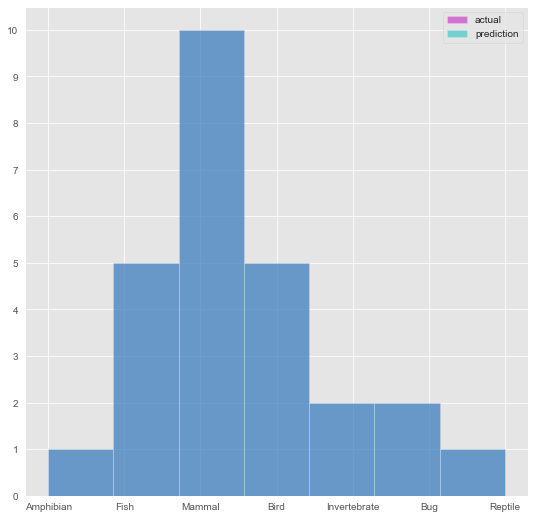

In [100]:
plt.rcParams['figure.figsize'] = (9,9) 
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

# Inference

So interestingly,
Replacing the feature legs with has_legs improved the accuracy of KNN models at every value where n >3 This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.